In [64]:
import k2
from typing import List

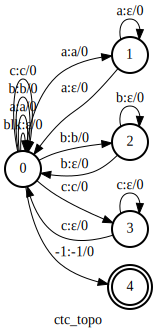

In [53]:
def build_ctc_topo2(phones: List[int]):
    assert 0 in phones, 'We assume 0 is the ID of the blank symbol'
    phones = phones.copy()
    phones.remove(0)
    
    num_phones = len(phones)
    
    start = 0
    final = num_phones + 1
    
    arcs = []
    arcs.append([start, start, 0, 0, 0])
    arcs.append([start, final, -1, -1, 0])
    arcs.append([final])
    for i, p in enumerate(phones): 
        i += 1
        arcs.append([start, start, p, p, 0])
        
        arcs.append([start, i, p, p, 0])
        arcs.append([i, i, p, 0, 0])
        
        arcs.append([i, start, p, 0, 0])
    
    arcs = sorted(arcs, key=lambda arc: arc[0])
    arcs = [[str(i) for i in arc] for arc in arcs]
    arcs = [' '.join(arc) for arc in arcs]
    arcs = '\n'.join(arcs)
    ctc_topo = k2.Fsa.from_str(arcs, False)
    return k2.arc_sort(ctc_topo)
    
    
isym = k2.SymbolTable.from_str('''
blk 0
a 1
b 2
c 3
''')    

osym = k2.SymbolTable.from_str('''
a 1
b 2
c 3
''')    

    
phones = [0, 1, 2, 3]    
ctc_topo = build_ctc_topo2(phones)
ctc_topo.labels_sym = isym 
ctc_topo.aux_labels_sym = osym 
k2.to_dot(ctc_topo, title='ctc_topo')

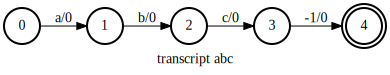

In [54]:
t = k2.linear_fsa([1, 2, 3])
t.labels_sym= isym
k2.to_dot(t, title='transcript abc')

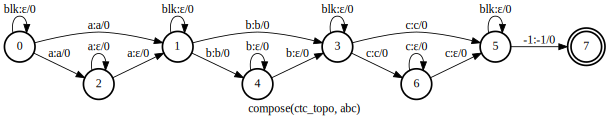

In [55]:
f = k2.compose(ctc_topo, t)
k2.to_dot(f, title='compose(ctc_topo, abc)')

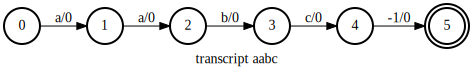

In [56]:
t = k2.linear_fsa([1, 1, 2, 3])
t.labels_sym = isym
k2.to_dot(t, title='transcript aabc')

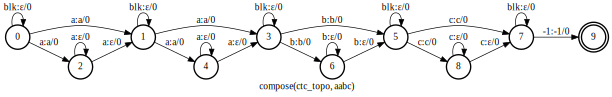

In [57]:
f = k2.compose(ctc_topo, t)
k2.to_dot(f, title='compose(ctc_topo, aabc)')

In [58]:
from snowfall.training.ctc_graph import build_ctc_topo

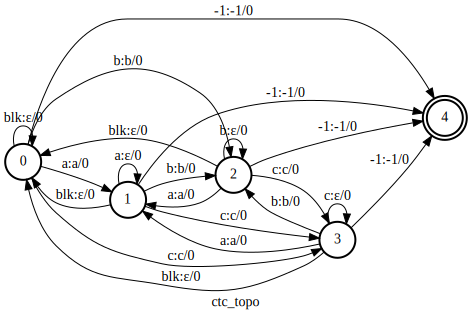

In [59]:
phones = [0, 1, 2, 3]    
ctc_topo = build_ctc_topo(phones)
ctc_topo.labels_sym = isym 
ctc_topo.aux_labels_sym = osym 
k2.to_dot(ctc_topo, title='ctc_topo')

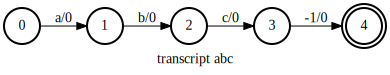

In [60]:
t = k2.linear_fsa([1, 2, 3])
t.labels_sym= isym
k2.to_dot(t, title='transcript abc')


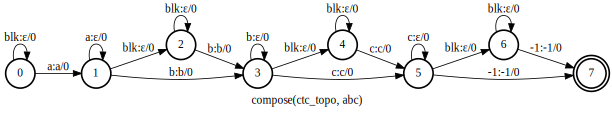

In [61]:
f = k2.compose(ctc_topo, t)
k2.to_dot(f, title='compose(ctc_topo, abc)')


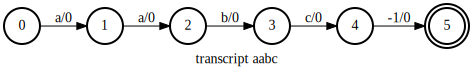

In [62]:
t = k2.linear_fsa([1, 1, 2, 3])
t.labels_sym = isym
k2.to_dot(t, title='transcript aabc')


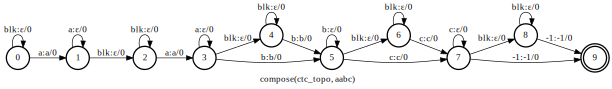

In [63]:
f = k2.compose(ctc_topo, t)
k2.to_dot(f, title='compose(ctc_topo, aabc)')


In [ ]:
def build_ctc_topo3(phones: List[int]):
    assert 0 in phones, 'We assume 0 is the ID of the blank symbol'
    phones = phones.copy()
    phones.remove(0)